In [1]:
# This is a sample script to analyze the results of measuring talker_listener.
# Please build the caret_analyze package before using it.
# The source code used for the measurement can be found here:
# https://github.com/hsgwa/trace_samples

In [2]:
import os
import sys

home = os.path.expanduser('~')
sys.path.append(home + '/ros2_caret_ws/build/caret_analyze')
# sys.path.append(home + '/ros2_caret_ws/install/caret_analyze_cpp_impl/lib/python3.8/site-packages') # cpp 実装の結果がおかしい。一旦無効化
# or execute soruce command before running jupyter.
# source ~/ros2_caret_ws/install/local_setup.bash

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
import caret_analyze as caret
import caret_analyze.plot as caret_plot

Failed to find record_cpp_impl. the Python version will be used.


In [6]:
trace_dir_path = './end_to_end_sample/'
lttng = caret.Lttng(trace_dir_path, force_conversion=True)

found converted file but will re-create it: ./end_to_end_sample/converted
converting trace directory: ./end_to_end_sample
converted 4497 events in 254 ms
output written to: ./end_to_end_sample/converted
 [100%] [Ros2Handler]


In [7]:
arch = caret.Architecture()
architecture_path = './end_to_end_sample/architecture_modified.yaml'
arch.import_file(file_path = architecture_path, file_type='yaml', latency_composer=lttng)

In [8]:
app = caret.Application(arch)

In [9]:
node = app.nodes[0]
print('node_name: ' + node.node_name)

callback = node.callbacks[0]
print('callback_type: ' + callback.TYPE_NAME)
print('subscription topic name :' + callback.topic_name)
print('callback_name: ' + callback.callback_name)
print('callback symbol: ' + callback.symbol)
print('callback unique name: ' + callback.unique_name)

node_name: /actuator_dummy_node
callback_type: subscription_callback
subscription topic name :/topic4
callback_name: subscription_callback_0
callback symbol: ActuatorDummy::ActuatorDummy(std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>,std::__cxx11::basic_string<char,std::char_traits<char>,std::allocator<char>>)::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
callback unique name: /actuator_dummy_node/subscription_callback_0


node_name:  /message_driven_node
callbacks:
/message_driven_node/subscription_callback_0
/message_driven_node/subscription_callback_1


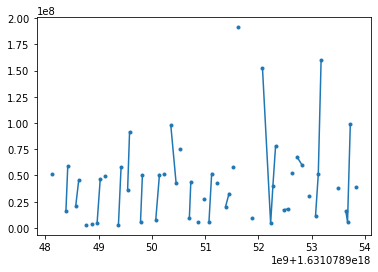

In [10]:
node = app.nodes[2]
print('node_name: ', node.node_name)

node_path = node.paths[0]
print('callbacks:')
print(node_path)
t, latency = node_path.to_timeseries()
plt.plot(t, latency, marker='.')

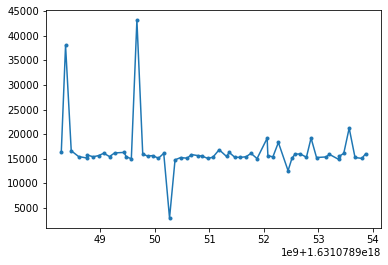

In [11]:
callback = app.callbacks[0]
t, latency = callback.to_timeseries(remove_dropped=True)
plt.plot(t, latency, marker='.')

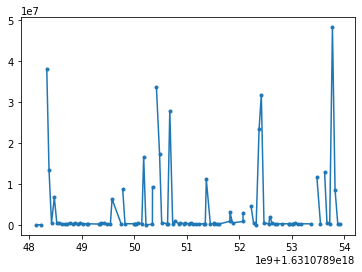

In [12]:
comm = app.communications[0]
pub_sub = comm.to_pubsub_latency()
t,latency =pub_sub.to_timeseries()
plt.plot(t, latency, marker='.')

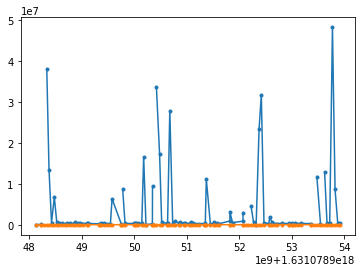

In [13]:
pubsub = comm.to_pubsub_latency()
t,latency =pubsub.to_timeseries()
plt.plot(t, latency, marker='.')

dds = comm.to_dds_latency()
t,latency =dds.to_timeseries()
plt.plot(t, latency, marker='.')

In [14]:
start_callback_unique_name = app.callbacks[6].unique_name
end_callback_unique_name = app.callbacks[0].unique_name
print('path search')
print('start_callback: ' + start_callback_unique_name)
print('end_callback: ' + end_callback_unique_name)

path search
start_callback: /sensor_dummy_node/timer_callback_0
end_callback: /actuator_dummy_node/subscription_callback_0


In [15]:
app.nodes[2].callbacks

In [16]:
paths = app.search_paths(start_callback_unique_name, end_callback_unique_name)
path = paths[0]

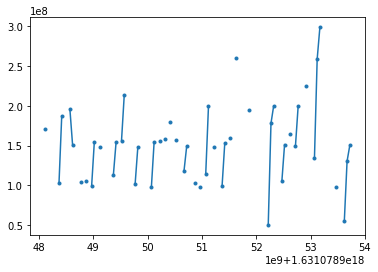

In [17]:
t, latency = path.to_timeseries()
plt.plot(t, latency, marker='.')

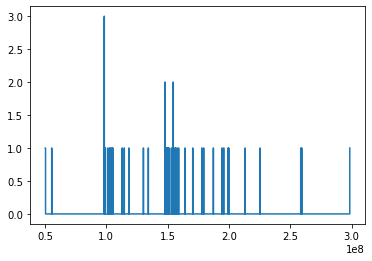

In [18]:
histogram, bins = path.to_histogram(binsize_ns=100000)
plt.step(bins[:-1], histogram, where='post')

In [19]:
path.to_dataframe()

,/sensor_dummy_node/timer_callback_0/callback_start_timestamp/0,/sensor_dummy_node/timer_callback_0/callback_end_timestamp/0,/sensor_dummy_node/timer_callback_0/rclcpp_publish_timestamp/0,/sensor_dummy_node/timer_callback_0/rcl_publish_timestamp/0,/sensor_dummy_node/timer_callback_0/dds_write_timestamp/0,/filter_node/subscription_callback_0/on_data_available_timestamp/0,/filter_node/subscription_callback_0/callback_start_timestamp/0,/filter_node/subscription_callback_0/callback_end_timestamp/0,/filter_node/subscription_callback_0/rclcpp_publish_timestamp/0,/filter_node/subscription_callback_0/rcl_publish_timestamp/0,...,/timer_driven_node/subscription_callback_0/callback_start_timestamp/0,/timer_driven_node/subscription_callback_0/callback_end_timestamp/0,/timer_driven_node/timer_callback_0/callback_start_timestamp/0,/timer_driven_node/timer_callback_0/callback_end_timestamp/0,/timer_driven_node/timer_callback_0/rclcpp_publish_timestamp/0,/timer_driven_node/timer_callback_0/rcl_publish_timestamp/0,/timer_driven_node/timer_callback_0/dds_write_timestamp/0,/actuator_dummy_node/subscription_callback_0/on_data_available_timestamp/0,/actuator_dummy_node/subscription_callback_0/callback_start_timestamp/0,/actuator_dummy_node/subscription_callback_0/callback_end_timestamp/0
0,1631078948120053164,1631078948120101090,1631078948120063183,1631078948120064889,1631078948120067168,1631078948120095788,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18
1,1631078948169932670,1631078948169971331,1631078948169940958,1631078948169942393,1631078948169943739,1631078948169967137,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1631078948219934355,1631078948219968132,1631078948219940617,1631078948219941836,1631078948219943027,1631078948219962601,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1631078948270274720,1631078948270369064,1631078948270291154,1631078948270294508,1631078948270297841,1631078948270353444,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1631078948320052020,1631078948320143556,1631078948320068346,1631078948320071956,1631078948320075354,1631078948320128202,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1631078953720367367,1631078953720457337,1631078953720383926,1631078953720387462,1631078953720390650,1631078953720443265,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18
113,1631078953770362987,1631078953770450436,1631078953770378879,1631078953770382098,1631078953770385254,1631078953770436967,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,1631078953820055910,1631078953820163796,1631078953820074072,1631078953820078236,1631078953820081854,1631078953820143332,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,1.631079e+18,1.631079e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,1631078953870276980,1631078953870371080,1631078953870292979,1631078953870296469,1631078953870300062,1631078953870356820,1.631079e+18,1.631079e+18,1.631079e+18,1.631079e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
caret_plot.message_flow(path, granularity='raw')

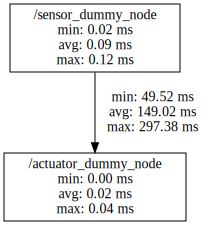

In [22]:
caret_plot.path_latency(path,granularity='end-to-end')